Proyecto EDA con Python
1. Carga de los Datos y Unificación
a. Carga de los Datos desde Archivos
Cargamos los datos desde los archivos proporcionados y creamos copias de seguridad para asegurarnos de que siempre podamos volver a los datos originales si es necesario.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer opciones para mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

# Cargar el archivo CSV y renombrar DataFrame
marketing_data = pd.read_csv(r'G:\Mi unidad\DATA ANALYST - THEPOWER\DATA ANALYST\PYTHON\PANDAS\DatosProyecto\bank-additional.csv')

# Crear una copia de seguridad del DataFrame original
marketing_data_backup = marketing_data.copy()

# Cargar las hojas del archivo Excel y renombrar DataFrames
customer_data_2012 = pd.read_excel(r'G:\Mi unidad\DATA ANALYST - THEPOWER\DATA ANALYST\PYTHON\PANDAS\DatosProyecto\customer-details.xlsx', sheet_name='2012')
customer_data_2013 = pd.read_excel(r'G:\Mi unidad\DATA ANALYST - THEPOWER\DATA ANALYST\PYTHON\PANDAS\DatosProyecto\customer-details.xlsx', sheet_name='2013')
customer_data_2014 = pd.read_excel(r'G:\Mi unidad\DATA ANALYST - THEPOWER\DATA ANALYST\PYTHON\PANDAS\DatosProyecto\customer-details.xlsx', sheet_name='2014')

# Crear copias de seguridad de los DataFrames originales
customer_data_2012_backup = customer_data_2012.copy()
customer_data_2013_backup = customer_data_2013.copy()
customer_data_2014_backup = customer_data_2014.copy()


1.2 Renombrar Columnas para Facilitar la Fusión
Renombramos la columna ID a id_ en las hojas del archivo Excel para que coincidan con la columna id_ en el archivo CSV y faciliten la fusión.

In [36]:
# Renombrar columna 'ID' a 'id_' para facilitar la fusión
customer_data_2012.rename(columns={'ID': 'id_'}, inplace=True)
customer_data_2013.rename(columns={'ID': 'id_'}, inplace=True)
customer_data_2014.rename(columns={'ID': 'id_'}, inplace=True)


1.3 Combinar los Datos de Clientes de Diferentes Años
Concatenamos los datos de clientes de los diferentes años en un solo DataFrame customer_data.

In [37]:
# Concatenar datos de clientes de diferentes años en un solo DataFrame
customer_data = pd.concat([customer_data_2012, customer_data_2013, customer_data_2014], ignore_index=True)


1.4 Fusionar los DataFrames
Fusionamos marketing_data con customer_data utilizando la columna id_ como clave común.

In [38]:
# Fusionar marketing_data con customer_data
merged_data = pd.merge(marketing_data, customer_data, on='id_')

# Crear copia de seguridad del DataFrame fusionado
merged_data_backup = merged_data.copy()


2. Transformación y Limpieza del Conjunto de Datos Unificado
2.1 Identificación y Manejo de Valores Faltantes
Identificamos y manejamos los valores faltantes en el DataFrame unificado.

Unnamed: 0_x             0
age                      0
job                    345
marital                 85
education             1807
default                  0
housing                  0
loan                     0
contact                  0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome                 0
emp.var.rate             0
cons.price.idx         471
cons.conf.idx            0
euribor3m             9256
nr.employed              0
y                        0
date                 43000
latitude                 0
longitude                0
id_                      0
Unnamed: 0_y             0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
NumWebVisitsMonth        0
dtype: int64


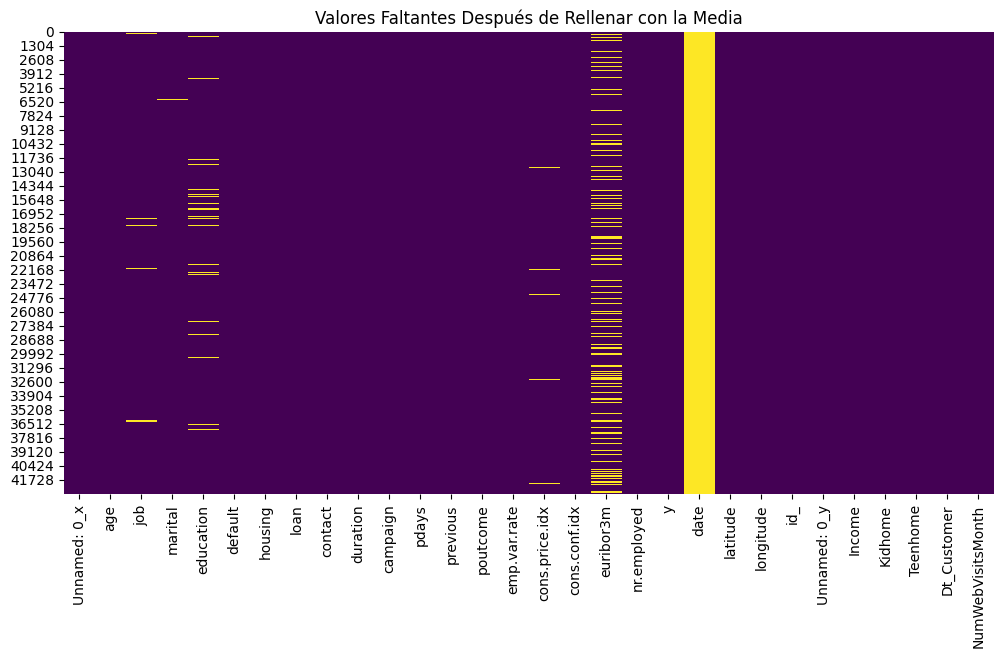

In [44]:
# Identificar valores faltantes en merged_data
print(merged_data.isnull().sum())

# Calcular la media solo para las columnas numéricas
numeric_columns = merged_data.select_dtypes(include=['number']).columns
numeric_means = merged_data[numeric_columns].mean()

# Rellenar valores faltantes solo en las columnas numéricas con la media
merged_data[numeric_columns] = merged_data[numeric_columns].fillna(numeric_means)

# Visualización de valores faltantes antes y después de rellenar
plt.figure(figsize=(12, 6))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Faltantes Después de Rellenar con la Media')
plt.show()


2.2 Conversión de Tipos de Datos
Convertimos las columnas de fechas en formato datetime y las columnas categóricas en category.

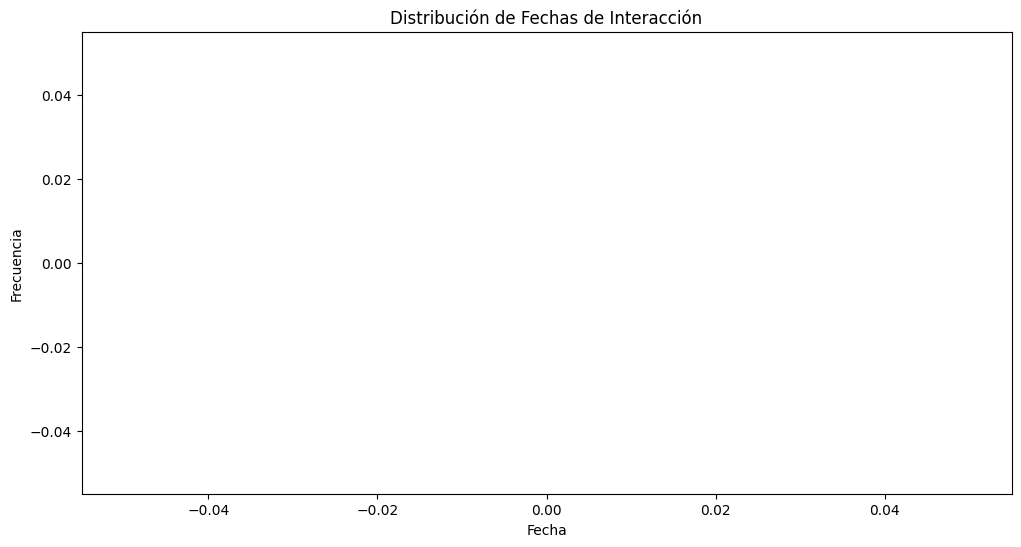

In [45]:
# Convertir columnas de fechas en datetime con el formato especificado
try:
    merged_data['date'] = pd.to_datetime(merged_data['date'], format='%d-%B-%Y', errors='coerce')
    merged_data['Dt_Customer'] = pd.to_datetime(merged_data['Dt_Customer'], format='%d-%B-%Y', errors='coerce')
except Exception as e:
    print(f"Error al convertir columnas de fechas: {e}")

# Visualización de la distribución de las fechas
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['date'].dropna(), kde=True)
plt.title('Distribución de Fechas de Interacción')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.show()

# Convertir columnas categóricas en category
try:
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']
    merged_data[categorical_columns] = merged_data[categorical_columns].astype('category')
except Exception as e:
    print(f"Error al convertir columnas categóricas: {e}")


2.3 Eliminar Duplicados
Eliminamos los registros duplicados del DataFrame unificado.

In [46]:
# Eliminar duplicados en merged_data
initial_count = merged_data.shape[0]
merged_data.drop_duplicates(inplace=True)
final_count = merged_data.shape[0]

# Visualización del número de duplicados eliminados
print(f'Número de duplicados eliminados: {initial_count - final_count}')


Número de duplicados eliminados: 0


2.4 Otras Transformaciones
Realizamos otras transformaciones necesarias, como crear una nueva columna para el número total de hijos en el hogar.

In [ ]:
# Crear una nueva columna para el número total de hijos
merged_data['Total_Children'] = merged_data['Kidhome'] + merged_data['Teenhome']

# Visualización de la distribución del número total de hijos
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['Total_Children'], bins=10, kde=True)
plt.title('Distribución del Número Total de Hijos')
plt.xlabel('Número Total de Hijos')
plt.ylabel('Frecuencia')
plt.show()


3. Análisis Descriptivo y Visualización
3.1 Estadísticas Descriptivas
Calculamos medidas estadísticas y analizamos la correlación entre las variables.

       Unnamed: 0_x           age      duration      campaign         pdays  \
count  43000.000000  43000.000000  43000.000000  43000.000000  43000.000000   
mean   20651.099047     39.977112    257.739279      2.567233    962.330953   
min        0.000000     17.000000      0.000000      1.000000      0.000000   
25%    10381.750000     33.000000    102.000000      1.000000    999.000000   
50%    20642.500000     39.977112    179.000000      2.000000    999.000000   
75%    30930.250000     46.000000    319.000000      3.000000    999.000000   
max    41187.000000     98.000000   4918.000000     56.000000    999.000000   
std    11868.770913      9.796830    258.666033      2.772294    187.260394   

           previous  emp.var.rate date      latitude     longitude  \
count  43000.000000  43000.000000    0  43000.000000  43000.000000   
mean       0.174023      0.077128  NaT     36.856697    -95.939067   
min        0.000000     -3.400000  NaT     24.396000   -124.997000   
25%     

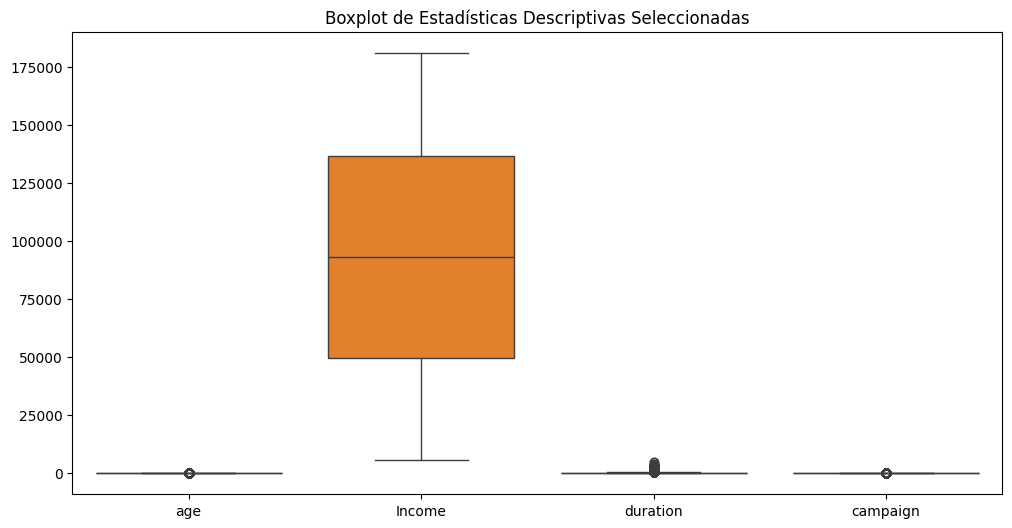

In [47]:
# Estadísticas descriptivas
print(merged_data.describe())

# Visualización de estadísticas descriptivas seleccionadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data[['age', 'Income', 'duration', 'campaign']])
plt.title('Boxplot de Estadísticas Descriptivas Seleccionadas')
plt.show()


3.2 Análisis de Correlación
Seleccionamos solo las columnas numéricas y calculamos la matriz de correlación.

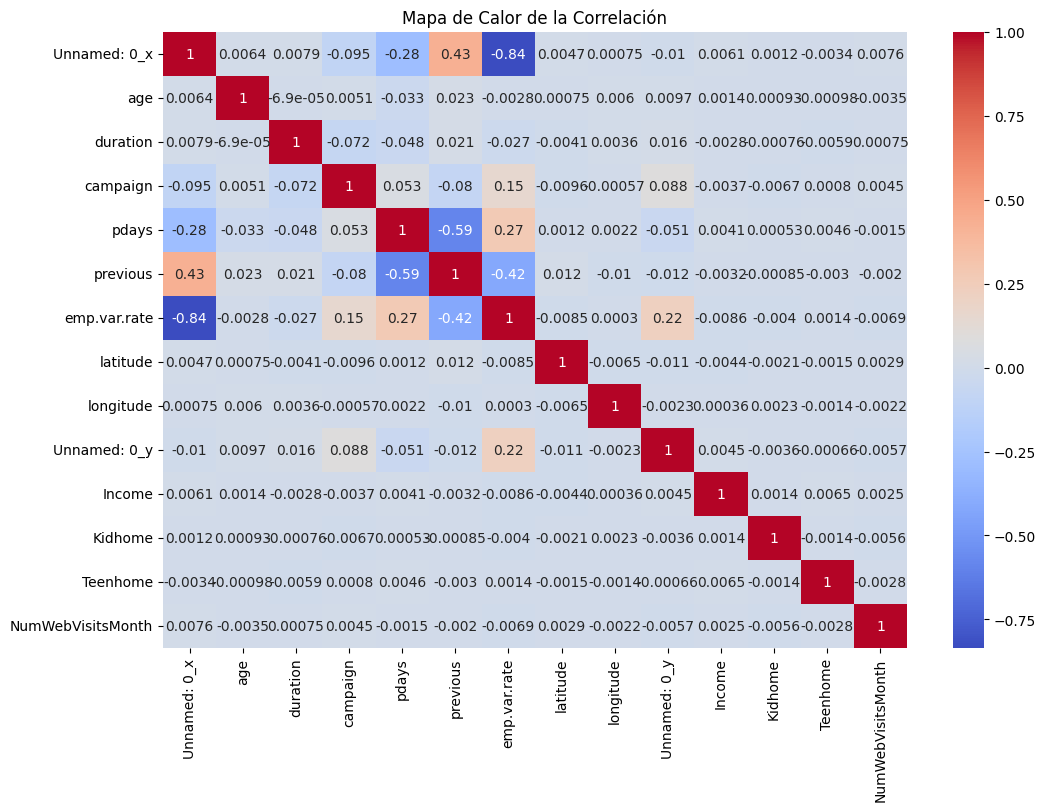

In [48]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_columns = merged_data.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = merged_data[numeric_columns].corr()

# Visualización del mapa de calor de la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación')
plt.show()
